In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [6]:
# Load the data from the PDF file into a Pandas DataFrame
df = pd.read_csv('Event Feedback (Responses) - Form Responses 1.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

print("\nFirst few rows:")
print(df.head())


Dataset Shape: (41, 23)

Column Names:
1. Timestamp
2. How satisfied were you with the event?
3. How relevant and helpful do you think it was for your job?
4. What were your key take aways from this event?
5. How satisfied were you with the logistics? [Accommodation]
6. How satisfied were you with the logistics? [Welcome kit]
7. How satisfied were you with the logistics? [Communication emails]
8. How satisfied were you with the logistics? [Transportation]
9. How satisfied were you with the logistics? [Welcome activity]
10. How satisfied were you with the logistics? [Venue]
11. How satisfied were you with the logistics? [Activities]
12. How satisfied were you with the logistics? [Closing ceremony]
13. Additional feedback on logistics
14. Which sessions did you find most relevant? [Welcome activity]
15. Which sessions did you find most relevant? [Speaker #1]
16. Which sessions did you find most relevant? [Activity #1]
17. Which sessions did you find most relevant? [Speaker #2]
18. Which 

In [3]:
# Get an overview of the data
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 23 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Timestamp                                                          41 non-null     object 
 1   How satisfied were you with the event?                             41 non-null     int64  
 2   How relevant and helpful do you think it was for your job?         41 non-null     int64  
 3   What were your key take aways from this event?                     41 non-null     object 
 4   How satisfied were you with the logistics? [Accommodation]         41 non-null     int64  
 5   How satisfied were you with the logistics? [Welcome kit]           35 non-null     float64
 6   How satisfied were you with the logistics? [Communication emails]  41 non-null     int64  
 7   How satisfied were you with 

In [7]:
# Function to convert satisfaction ratings to numeric
def convert_rating_to_numeric(rating):
    """Convert satisfaction ratings to numeric scale"""
    if pd.isna(rating):
        return np.nan
    rating_str = str(rating).lower()
    if 'very satisfied' in rating_str or '5' in rating_str:
        return 5
    elif 'satisfied' in rating_str or '4' in rating_str:
        return 4
    elif 'neutral' in rating_str or '3' in rating_str:
        return 3
    elif 'dissatisfied' in rating_str or '2' in rating_str:
        return 2
    elif 'very dissatisfied' in rating_str or '1' in rating_str:
        return 1
    else:
        return np.nan

# Function to convert yes/no responses to numeric
def convert_yesno_to_numeric(response):
    """Convert Yes/No responses to 1/0"""
    if pd.isna(response):
        return np.nan
    response_str = str(response).lower()
    if 'yes' in response_str:
        return 1
    elif 'no' in response_str:
        return 0
    else:
        return np.nan


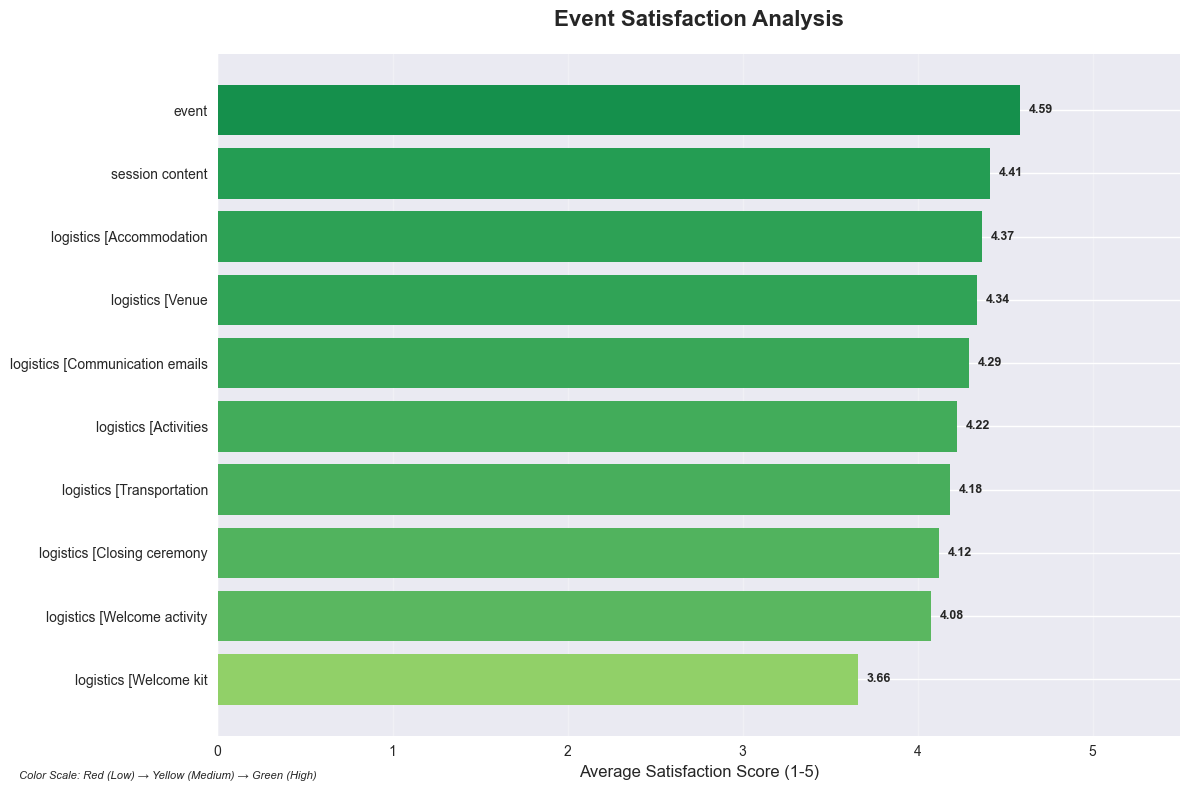

SATISFACTION ANALYSIS SUMMARY
Total satisfaction questions analyzed: 10
Overall average satisfaction: 4.23/5.0
Highest rated aspect: event (4.59)
Lowest rated aspect: logistics [Welcome kit (3.66)

Detailed Scores:
  • event: 4.59/5.0
  • session content: 4.41/5.0
  • logistics [Accommodation: 4.37/5.0
  • logistics [Venue: 4.34/5.0
  • logistics [Communication emails: 4.29/5.0
  • logistics [Activities: 4.22/5.0
  • logistics [Transportation: 4.18/5.0
  • logistics [Closing ceremony: 4.12/5.0
  • logistics [Welcome activity: 4.08/5.0
  • logistics [Welcome kit: 3.66/5.0


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to convert satisfaction ratings to numeric
def convert_rating_to_numeric(rating):
    """Convert satisfaction ratings to numeric scale"""
    if pd.isna(rating):
        return np.nan
    rating_str = str(rating).lower()
    if 'very satisfied' in rating_str or '5' in rating_str:
        return 5
    elif 'satisfied' in rating_str or '4' in rating_str:
        return 4
    elif 'neutral' in rating_str or '3' in rating_str:
        return 3
    elif 'dissatisfied' in rating_str or '2' in rating_str:
        return 2
    elif 'very dissatisfied' in rating_str or '1' in rating_str:
        return 1
    else:
        return np.nan

# Create single figure
plt.figure(figsize=(12, 8))

# Find satisfaction columns
satisfaction_cols = [col for col in df.columns if 'satisfied' in col.lower()]

if satisfaction_cols:
    # Convert satisfaction ratings to numeric
    satisfaction_data = {}
    for col in satisfaction_cols:
        # Clean column names for better readability
        clean_name = col.replace('How satisfied were you with ', '').replace('?', '').replace('the ', '').replace('logistics? [', '').replace(']', '')
        satisfaction_data[clean_name] = df[col].apply(convert_rating_to_numeric)
    
    satisfaction_df = pd.DataFrame(satisfaction_data)
    
    # Calculate average satisfaction scores
    avg_satisfaction = satisfaction_df.mean().sort_values(ascending=True)
    
    # Create horizontal bar plot
    bars = plt.barh(range(len(avg_satisfaction)), avg_satisfaction.values, 
                    color=plt.cm.RdYlGn(avg_satisfaction.values/5))
    
    # Customize the plot
    plt.yticks(range(len(avg_satisfaction)), avg_satisfaction.index, fontsize=10)
    plt.xlabel('Average Satisfaction Score (1-5)', fontsize=12)
    plt.title('Event Satisfaction Analysis', fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, avg_satisfaction.values)):
        plt.text(value + 0.05, i, f'{value:.2f}', 
                va='center', fontweight='bold', fontsize=9)
    
    # Set x-axis limits for better visualization
    plt.xlim(0, 5.5)
    
    # Add color legend
    plt.figtext(0.02, 0.02, 'Color Scale: Red (Low) → Yellow (Medium) → Green (High)', 
                fontsize=8, style='italic')
    
else:
    # If no satisfaction columns found
    plt.text(0.5, 0.5, 'No satisfaction-related columns found in the dataset', 
             ha='center', va='center', transform=plt.gca().transAxes, 
             fontsize=14, bbox=dict(boxstyle='round', facecolor='lightgray'))
    plt.title('Satisfaction Analysis - No Data Available', fontsize=16)

plt.tight_layout()
plt.show()

# Print summary statistics
if satisfaction_cols:
    print("="*50)
    print("SATISFACTION ANALYSIS SUMMARY")
    print("="*50)
    print(f"Total satisfaction questions analyzed: {len(satisfaction_cols)}")
    print(f"Overall average satisfaction: {avg_satisfaction.mean():.2f}/5.0")
    print(f"Highest rated aspect: {avg_satisfaction.idxmax()} ({avg_satisfaction.max():.2f})")
    print(f"Lowest rated aspect: {avg_satisfaction.idxmin()} ({avg_satisfaction.min():.2f})")
    print("\nDetailed Scores:")
    for aspect, score in avg_satisfaction.sort_values(ascending=False).items():
        print(f"  • {aspect}: {score:.2f}/5.0")


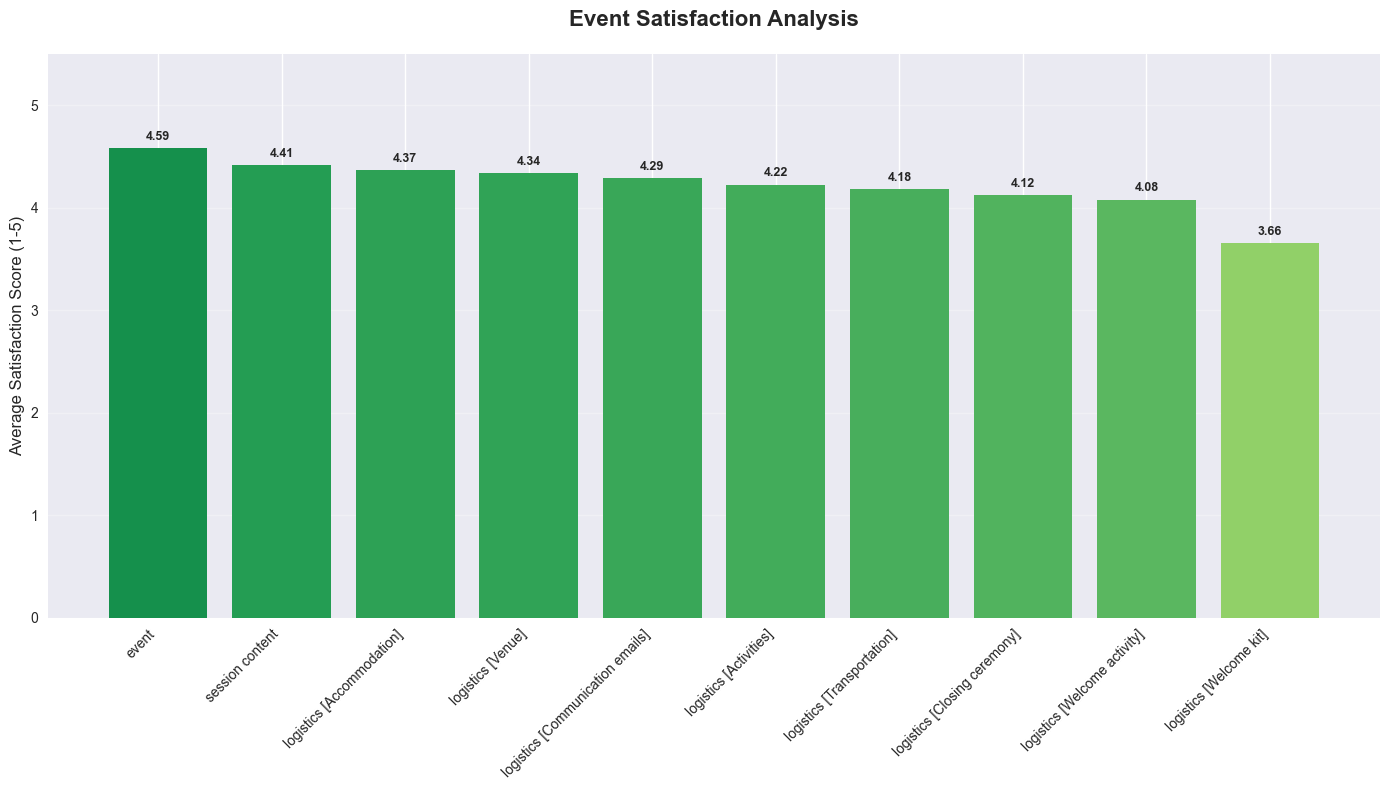

In [15]:
# Create single vertical bar chart
plt.figure(figsize=(14, 8))

satisfaction_cols = [col for col in df.columns if 'satisfied' in col.lower()]

if satisfaction_cols:
    satisfaction_data = {}
    for col in satisfaction_cols:
        clean_name = col.replace('How satisfied were you with ', '').replace('?', '').replace('the ', '')
        satisfaction_data[clean_name] = df[col].apply(convert_rating_to_numeric)
    
    satisfaction_df = pd.DataFrame(satisfaction_data)
    avg_satisfaction = satisfaction_df.mean().sort_values(ascending=False)
    
    # Create vertical bar plot
    bars = plt.bar(range(len(avg_satisfaction)), avg_satisfaction.values, 
                   color=plt.cm.RdYlGn(avg_satisfaction.values/5))
    
    # Customize the plot
    plt.xticks(range(len(avg_satisfaction)), avg_satisfaction.index, 
               rotation=45, ha='right', fontsize=10)
    plt.ylabel('Average Satisfaction Score (1-5)', fontsize=12)
    plt.title('Event Satisfaction Analysis', fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, value in zip(bars, avg_satisfaction.values):
        plt.text(bar.get_x() + bar.get_width()/2, value + 0.05, f'{value:.2f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    plt.ylim(0, 5.5)

plt.tight_layout()
plt.show()


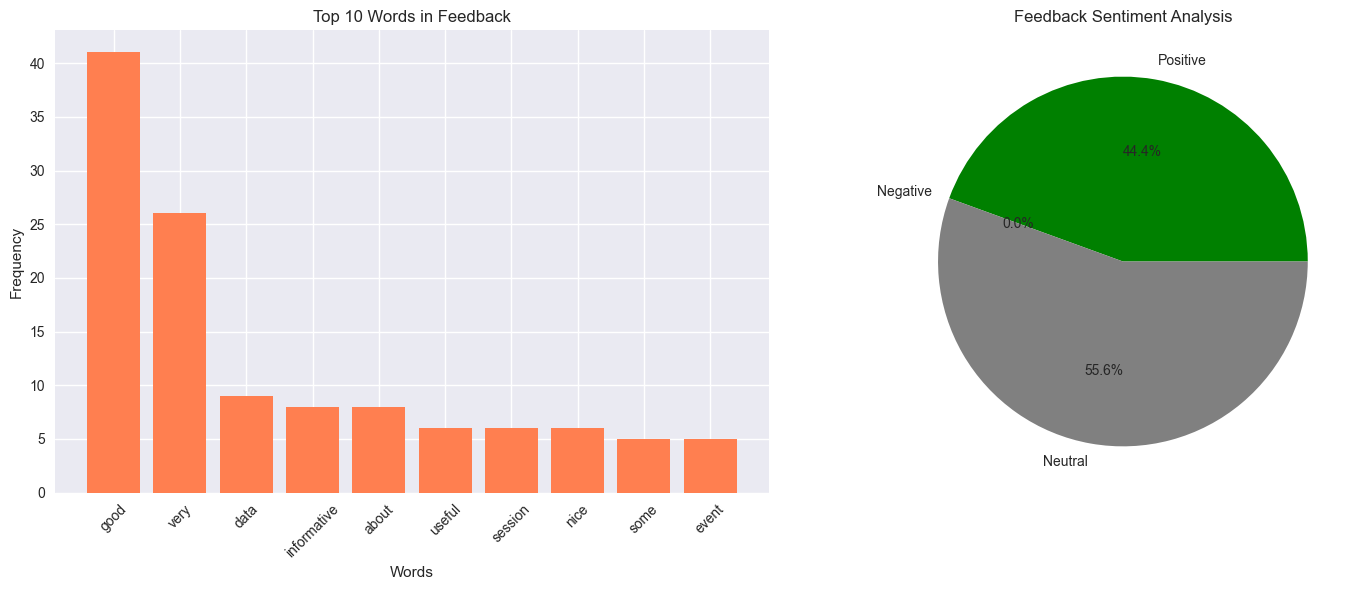

In [10]:
# Text Analysis for Feedback Comments
def analyze_text_feedback():
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Find text feedback columns
    text_cols = [col for col in df.columns if any(word in col.lower() 
                for word in ['feedback', 'comment', 'suggestion', 'improve'])]
    
    if text_cols:
        # Combine all text feedback
        all_feedback = []
        for col in text_cols:
            feedback_text = df[col].dropna().astype(str).tolist()
            all_feedback.extend(feedback_text)
        
        if all_feedback:
            # Word frequency analysis
            all_words = ' '.join(all_feedback).lower().split()
            # Remove common stop words
            stop_words = {'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'was', 'are', 'were', 'a', 'an'}
            filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]
            
            word_freq = Counter(filtered_words)
            top_words = dict(word_freq.most_common(10))
            
            # Plot word frequency
            axes[0].bar(top_words.keys(), top_words.values(), color='coral')
            axes[0].set_title('Top 10 Words in Feedback')
            axes[0].set_xlabel('Words')
            axes[0].set_ylabel('Frequency')
            axes[0].tick_params(axis='x', rotation=45)
            
            # Sentiment analysis (simple positive/negative word count)
            positive_words = ['good', 'great', 'excellent', 'amazing', 'wonderful', 'fantastic', 'helpful', 'useful']
            negative_words = ['bad', 'poor', 'terrible', 'awful', 'boring', 'confusing', 'disappointing']
            
            pos_count = sum([all_words.count(word) for word in positive_words])
            neg_count = sum([all_words.count(word) for word in negative_words])
            neutral_count = len(all_feedback) - pos_count - neg_count
            
            # Sentiment pie chart
            sentiment_data = [pos_count, neg_count, neutral_count]
            sentiment_labels = ['Positive', 'Negative', 'Neutral']
            colors = ['green', 'red', 'gray']
            
            axes[1].pie(sentiment_data, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
            axes[1].set_title('Feedback Sentiment Analysis')
    
    plt.tight_layout()
    plt.show()

analyze_text_feedback()


In [ ]:
def generate_insights(df):
    """Generate key insights from the data"""
    print("="*50)
    print("EVENT FEEDBACK ANALYSIS - KEY INSIGHTS")
    print("="*50)
    
    total_responses = len(df)
    print(f"📊 Total Survey Responses: {total_responses}")
    
    # Completion rate analysis
    completion_rates = [(df[col].notna().sum() / len(df)) * 100 for col in df.columns]
    avg_completion = np.mean(completion_rates)
    print(f"📈 Average Question Completion Rate: {avg_completion:.1f}%")
    
    # Find satisfaction columns and analyze
    satisfaction_cols = [col for col in df.columns if 'satisfied' in col.lower()]
    if satisfaction_cols:
        print(f"🎯 Found {len(satisfaction_cols)} satisfaction-related questions")
        
        # Try to analyze satisfaction scores
        for col in satisfaction_cols[:3]:  # Analyze first 3
            responses = df[col].value_counts()
            print(f"   • {col}: {responses.index[0]} (most common)")
    
    # Text feedback analysis
    text_cols = [col for col in df.columns if any(word in col.lower() 
                for word in ['feedback', 'comment', 'suggestion'])]
    
    if text_cols:
        print(f"💬 Found {len(text_cols)} text feedback columns")
        all_text = []
        for col in text_cols:
            all_text.extend(df[col].dropna().astype(str).tolist())
        
        if all_text:
            avg_length = np.mean([len(text) for text in all_text])
            print(f"   • Average response length: {avg_length:.0f} characters")
    
    print("\n🔍 RECOMMENDATIONS:")
    if avg_completion < 80:
        print("   • Consider shortening the survey to improve completion rates")
    if avg_completion > 90:
        print("   • Excellent completion rate! Current format works well")
    
    print("   • Focus on collecting more structured data for better analysis")
    print("   • Consider using standardized rating scales (1-5 or 1-10)")
    print("   • Implement real-time feedback collection for future events")
    
    return {
        'total_responses': total_responses,
        'avg_completion': avg_completion,
        'satisfaction_questions': len(satisfaction_cols),
        'text_questions': len(text_cols)
    }

# Generate insights
insights = generate_insights(df)

EVENT FEEDBACK ANALYSIS - KEY INSIGHTS
📊 Total Survey Responses: 41
📈 Average Question Completion Rate: 98.0%
🎯 Found 10 satisfaction-related questions
   • How satisfied were you with the event?: 5 (most common)
   • How satisfied were you with the logistics? [Accommodation]: 5 (most common)
   • How satisfied were you with the logistics? [Welcome kit]: 5.0 (most common)
💬 Found 3 text feedback columns
   • Average response length: 21 characters

🔍 RECOMMENDATIONS:
   • Excellent completion rate! Current format works well
   • Focus on collecting more structured data for better analysis
   • Consider using standardized rating scales (1-5 or 1-10)
   • Implement real-time feedback collection for future events
